# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
# Придумайте матрицы, которые обладают следующими свойствами:
# a) Диагональная, ортогональная, но не единичная(!)


m = np.diag([2,1,4,3])
print( m, 'Диагональная матрица')

[[2 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 0 3]] Диагональная матрица


In [2]:
mt = m.transpose()
mo = mt@m
print( mo, 'Диагональная, ортогональная матрица')

[[ 4  0  0  0]
 [ 0  1  0  0]
 [ 0  0 16  0]
 [ 0  0  0  9]] Диагональная, ортогональная матрица


In [3]:
# b) Верхнетреугольная, ортогональная
m1 = np.triu([[5,9,6,7],[4,8,10,11],[12,2,14,1],[3,15,16,18]], 0)

print( m1, 'Верхнетреугольная матрица')

[[ 5  9  6  7]
 [ 0  8 10 11]
 [ 0  0 14  1]
 [ 0  0  0 18]] Верхнетреугольная матрица


In [4]:
m1t = m1.transpose()
mo1 = m1t@m1
print( mo1, 'Верхнетреугольная, ортогональная матрица')

[[ 25  45  30  35]
 [ 45 145 134 151]
 [ 30 134 332 166]
 [ 35 151 166 495]] Верхнетреугольная, ортогональная матрица


In [5]:
m2 = np.tril([[5,9,6,7],[4,8,10,11],[12,2,14,1],[3,15,16,18]], -1)

In [6]:
print(m2)

[[ 0  0  0  0]
 [ 4  0  0  0]
 [12  2  0  0]
 [ 3 15 16  0]]


In [7]:
m2t = m2.transpose()
mo2 = m2t@m2
print( mo1, 'Нижнетреугольная, ортогональная матрица')

[[ 25  45  30  35]
 [ 45 145 134 151]
 [ 30 134 332 166]
 [ 35 151 166 495]] Нижнетреугольная, ортогональная матрица


In [8]:
# d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [9]:
m = np.array([[1, 2, 1], [1, 1, 6], [2, 3, 6]], dtype=np.float32)
det = np.linalg.det(m)
print(m)
print(det)

[[1. 2. 1.]
 [1. 1. 6.]
 [2. 3. 6.]]
1.0


In [10]:
# Найдите собственные значения и собственные вектора матриц:
m3 = np.array([[2, 2],[1, 3]])
w, v = np.linalg.eig(m3)
print(m3)

[[2 2]
 [1 3]]


In [11]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1:¶

In [12]:
import pylab as pl
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

from mnist.loader import MNIST
from sklearn.decomposition import PCA as RandomizedPCA

# Найдите спектральное разложение матрицы:

m = np.array([[1, 2],[2,3]])
print(m)

[[1 2]
 [2 3]]


In [13]:
a, U = linalg.eig(m)
print('Eigenvalues собственные значения матрицы m:')
print(np.array(a, dtype=float))
print('\nEigenvectors собственные вектора матрицы m:')
print(U)

Eigenvalues собственные значения матрицы m:
[-0.23606798  4.23606798]

Eigenvectors собственные вектора матрицы m:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [14]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float)) # спектральное разложение 

[[1. 2.]
 [2. 3.]]


In [15]:
# Постройте зависимость качества восстановления рукописных цифр (MNIST)
# в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*


In [16]:
data = load_digits()

X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

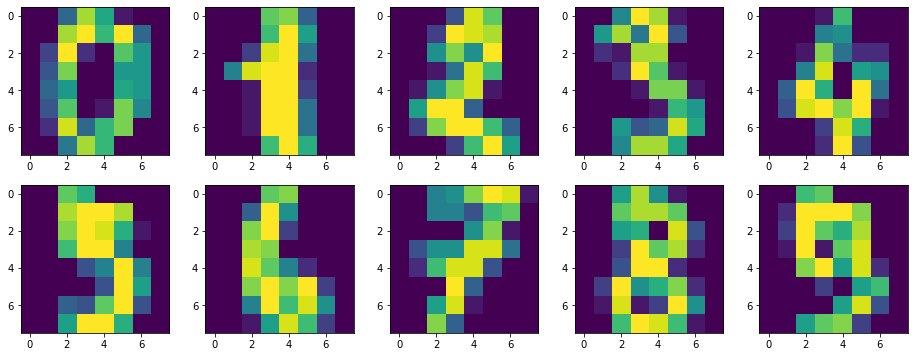

In [17]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

In [31]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=45)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (1797, 64)
transformed shape: (1797, 45)


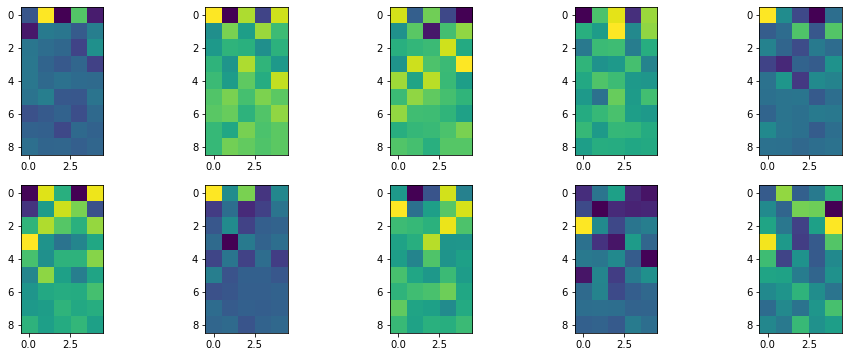

In [74]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_pca[i,:].reshape([9,5]));

In [75]:
X_pca_1 = pca.inverse_transform(X_pca)

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(X, X_pca_1))
rms

0.2817328155623085

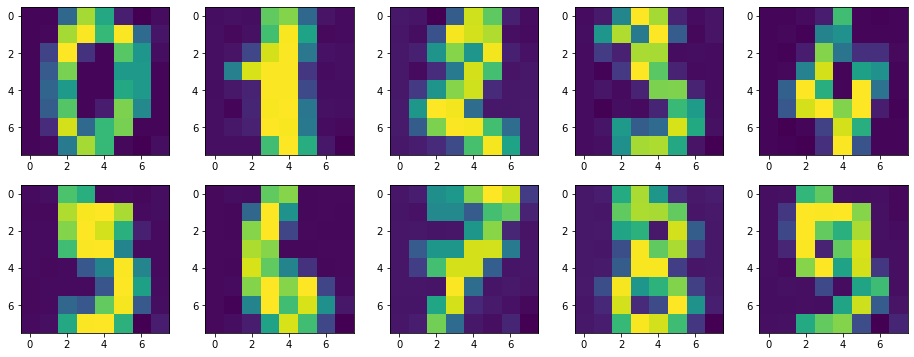

In [77]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_pca_1[i,:].reshape([8,8]));